# Jupyter interactif FastAF calcul du FES
#### Pierre Leclerc
#### 24/10/2023
---
---

Definition of optical length :  
![Capture d’écran 2023-10-12 141300.png](https://github.com/PlecHoriba/FastAF/blob/main/image/Capture%20d%E2%80%99%C3%A9cran%202023-10-12%20141300.png?raw=true)

---

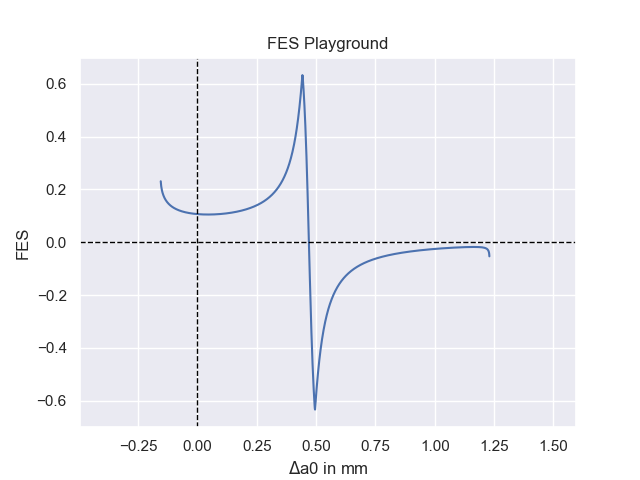

In [1]:
%matplotlib widget
import math
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Optical properties of lenses
f0 = 0.01
r0 = 0.005
fx = 0.130
fy = 0.150

# adding a tunable lens
fll = 0.01# liquid lens focal
lde = 0.0 # distance a la 1er lentille cylindrique de la liquid lens

# Parameters to be tuned
lx   = 0.200 # m 0.400
mx   = 0.150 # m 0.150
lxy  = 0.024 # m 0.030

# Def function
def calcul_FES (f0, r0,fx,fy, a0, lx, mx, lxy,fll,lde):
    # Compute rx ry and FES
    fx = fx*(fll-lde)/(fx+fll-lde)
    fy = fy*(fll-lde)/(fy+fll-lde)
    lx = lx + lde
    rx  = r0 * (mx/fx + mx*(a0-f0)/(a0*f0 - lx*a0 + lx*f0) - 1) * (1 - lx*(a0-f0)/(a0*f0))
    ry  = r0 * ((mx-lxy)/fy + (mx-lxy)*(a0-f0)/(a0*f0 - (lx+lxy)*a0 + (lx+lxy)*f0) - 1) * (1 - (lx+lxy)*(a0-f0)/(a0*f0))
    FES = 2/(math.pi)*(np.arcsin(np.abs(rx))/(np.sqrt(rx**2+ry**2)) - np.arcsin(np.abs(ry))/(np.sqrt(rx**2+ry**2)))
    return rx,ry,FES

def intervalofplot (f0):
    a0_min = f0 - 0.0004 #m
    a0_max = f0 + 0.0015 #m
    a0 = np.linspace(a0_min,a0_max,num = 2000) # to be change
    return a0

# MAIN Compute

fig = plt.figure()
ax = fig.gca()
line, = ax.plot((intervalofplot (f0)-f0)*1000, calcul_FES(f0, r0,fx,fy, intervalofplot (f0), lx, mx, lxy,fll,lde)[2])
vlinef0 = ax.axvline(0,lw=1,linestyle='dashed', color='black')
hline = ax.axhline(0,lw=1,linestyle='dashed', color='black')
ax.set_xlabel('$\Delta$a0 in mm')
ax.set_ylabel('FES')
ax.set_title('FES Playground')


def update(f0 = 0.01, r0 = 0.005, fx = 0.130, fy = 0.150, lx = 0.2, mx = 0.150, lxy = 0.024, fll = 0.04, lde = 0.02):
    line.set_ydata(calcul_FES(f0, r0,fx,fy, intervalofplot (f0), lx, mx, lxy,fll,lde)[2])
    vlinef0.set_xdata((0, 0))
    fig.canvas.draw_idle()
    
widget = interactive(update,
    f0 = widgets.FloatSlider(value=0.01,min=0.001,max=0.04,step=0.0001,description='f0:',disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.3f',),
    r0 = widgets.FloatSlider(value=0.005,min=0.001,max=0.01,step=0.001,description='r0:',disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.3f',),
    fx = widgets.FloatSlider(value=0.130,min=0.01,max=0.50,step=0.001,description='fx:',disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.3f',),
    fy = widgets.FloatSlider(value=0.150,min=0.01,max=0.50,step=0.001,description='fy:',disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.3f',),
    lx = widgets.FloatSlider(value=0.2,min=0.1,max=0.50,step=0.001,description='lx:',disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.3f',),
    mx = widgets.FloatSlider(value=0.150,min=0.01,max=0.20,step=0.001,description='mx:',disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.3f',),
    lxy = widgets.FloatSlider(value=0.024,min=0.001,max=0.10,step=0.0001,description='lxy:',disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.3f',),
    fll = widgets.FloatSlider(value=0.01,min=-0.1,max=0.1,step=0.0001,description='fll:',disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.3f',),
    lde = widgets.FloatSlider(value=0.011,min=0.011,max=0.10,step=0.0001,description='lde:',disabled=False,continuous_update=True,orientation='horizontal',readout=True,readout_format='.3f',)
    );

Objective = HBox(widget.children[:2], layout = Layout(flex_flow='row wrap'))
Cyl_Lens = HBox(widget.children[2:4], layout = Layout(flex_flow='row wrap'))
Pos =  HBox(widget.children[4:-1], layout = Layout(flex_flow='row wrap'))
display(VBox([Objective, Cyl_Lens,Pos]))